In [1]:
# !pip install sktime[all_extras] -q


In [16]:
from sktime.datasets import load_airline
from sktime.utils.plotting import plot_series
import numpy as np
from utils import CompanyStats
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.naive import NaiveForecaster

(<Figure size 1600x400 with 1 Axes>,
 <Axes: ylabel='Number of airline passengers'>)

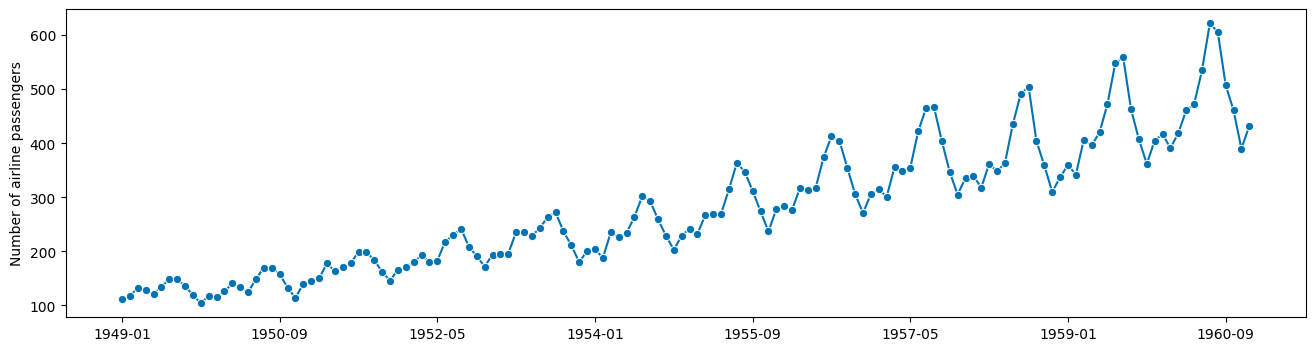

In [2]:
y = load_airline()

# plotting for visualization
plot_series(y)

In [11]:
stats = CompanyStats()

candles = stats.get_candles(dates=('2023-12-07', '2023-12-08'))
candles.set_index('begin', inplace=True)
candles

,open,close,high,low,value,volume
begin,,,,,,
2023-12-07 09:50:00,267.62,267.62,267.62,267.62,14703042.8,54940.0
2023-12-07 10:00:00,267.74,268.44,269.39,267.52,946363166.5,3525290.0
2023-12-07 10:10:00,268.44,269.76,270.19,268.36,896466106.5,3324320.0
2023-12-07 10:20:00,269.77,269.39,270.37,269.20,463233190.0,1716300.0
2023-12-07 10:30:00,269.40,270.12,270.44,269.40,384171284.7,1422260.0
...,...,...,...,...,...,...
2023-12-08 23:00:00,265.04,265.11,265.13,264.99,13841492.2,52220.0
2023-12-08 23:10:00,265.12,265.00,265.12,264.93,30204449.7,113980.0
2023-12-08 23:20:00,264.99,265.06,265.07,264.94,13745449.4,51870.0


(<Figure size 1600x400 with 1 Axes>, <Axes: ylabel='close'>)

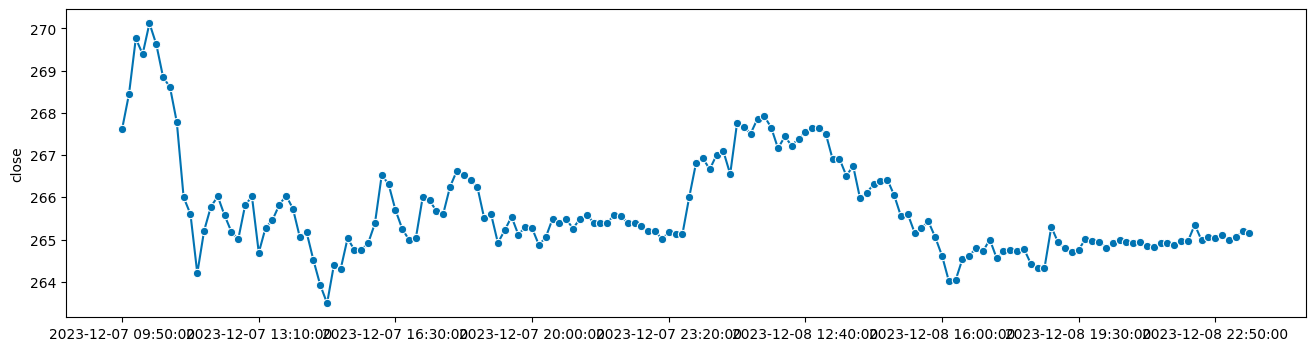

In [14]:
plot_series(candles['close'])

In [18]:
fh = np.arange(1, 10)

In [21]:
X = candles.drop(columns=['close'])
y = candles['close']

In [25]:
forecaster = NaiveForecaster(strategy="last")
forecaster.fit(y=y)

NaiveForecaster()

In [27]:
y_pred = forecaster.predict(fh,)
y_pred

ValueError: You must pass a freq argument as current index has none.